Load 05_fold_Y/scores_seqs.csv and 06_fold_X/scores.csv. For each unique sequence in 06_fold_X/scores_unique.csv, collect all the copies of that sequence from Y and X- should end up with 10 in each case. There may be duplicate which will increase the number of sequences here. Deal with that case if it occurs.

In [1]:
import pandas as pd

scores_Y_df = pd.read_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/scores_seqs.csv", index_col=0)
scores_X_df = pd.read_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/06_fold_X/scores.csv", index_col=0)
unique_df = pd.read_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/06_fold_X/scores_unique.csv", index_col=0)

In [2]:
scores_Y_df["full_seq"] = scores_Y_df["seq_A"] + "/" + scores_Y_df["seq_B"]

In [12]:
from tqdm.auto import tqdm

combined_dict = {}

for unique_seq, score_series in tqdm(unique_df.iterrows()):
    combo_Y_df = scores_Y_df.query(f"full_seq == '{unique_seq}'")
    combo_X_df = scores_X_df.query(f"full_seq == '{unique_seq}'")
    model_paths = {}
    for index, row in combo_Y_df.iterrows():
        model_paths[f"Y_model_{row['Y_model']}"] = index.replace("/pscratch/sd/b/broerman", "/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design")
    for index, row in combo_X_df.iterrows():
        model_paths[f"{row['X_protomer']}_X_model_{row['X_model']}"] = index.replace("/pscratch/sd/b/broerman", "/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design")
    combined_dict[unique_seq] = pd.concat([score_series, pd.Series(model_paths)]).sort_index()
combined_df = pd.DataFrame.from_dict(combined_dict, orient="index")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(combined_df)

2433it [03:02, 13.36it/s]


,A_X_mean_pae,A_X_mean_pae_interaction,A_X_mean_pae_intra_chain,A_X_mean_pae_intra_chain_A,A_X_mean_plddt,A_X_model,A_X_model_1,A_X_model_2,A_X_model_3,A_X_model_4,A_X_model_5,A_X_pTMscore,A_X_recycles,A_X_rmsd_to_input,A_X_seed,A_X_tol,A_X_type,A_num_X_models,B_X_mean_pae,B_X_mean_pae_interaction,B_X_mean_pae_intra_chain,B_X_mean_pae_intra_chain_A,B_X_mean_plddt,B_X_model,B_X_model_1,B_X_model_2,B_X_model_3,B_X_model_4,B_X_model_5,B_X_pTMscore,B_X_recycles,B_X_rmsd_to_input,B_X_seed,B_X_tol,B_X_type,B_num_X_models,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_model_1,Y_model_2,Y_model_3,Y_model_4,Y_model_5,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_seed,Y_tol,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,full_seq,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,num_Y_models,omega,pTMscore,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,recycles,ref,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,rmsd_to_input,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,seed,seq_A,seq_B,shift_A,shift_B,ss_sc,tol,total_length_A,total_length_B,total_score,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity
ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAEIAGRVAVLALELLWLDPDDADARRLVRRALRVLLALVLRESGAEGAVRAAELALELLRRDPDDAAARELARRALRVALERAEKENDAEIAERVARLAERLAELDPDDEEARRLAERARRAAERLRERRGL/ARELVEEARRALERLRADPSDEEARDRARRALERALEVAKKEGDARVALEVAILALDLLQVRPDDADARRLVLEAVEVALEIGKKRGRPVGALAVAALAILLLLWRPDDADARRLALEALEAALELAKKRNDAEVARAVADLARRLLDARPDDAEAARLAERAAEAAREIERKNGL,3.108984,NaN,2.996321,2.996321,95.747429,5,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,0.879492,3.0,1.536598,0,0.056215,monomer_ptm,5,3.816462,NaN,3.704110,3.704110,94.299644,3,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,0.842699,3.0,1.126294,0,0.103900,monomer_ptm,5,4.494983,5.351904,5.174434,5.529375,3.544076,3.602229,3.485923,92.920250,1,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,/home/broerman/crispy_shifty/projects/crispy_s...,0.857405,3.0,1.446266,0,0.404098,monomer_ptm,XAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAAAAGBAA...,XAAAAAAAAAAAAAAAABAABAAAAAAAAAAAAAAAAAAAAAGBAA...,176.549957,121.928787,54.621174,loop_remodel,loop_remodel,-1.0,442.373474,543.028625,685.864441,mpnn,19.0,30.0,4.0,0.0,LHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHHLLLHH...,LHHHHHHHHHHHHHHHHLLLLHHHHHHHHHHHHHHHHHHHHLLLHH...,4.202769,-4327.506251,1279.617676,59.126885,274.832089,423.865314,-1351.370428,-141.404896,-72.252497,1419.799442,126.893725,153.420593,7387.593371,2863.015899,ARELVEAARRALERLAADPSDRDAREEAR

In [20]:
combined_df[["Y_model_1", "Y_model_2", "Y_model_3", "Y_model_4", "Y_model_5", "A_X_model_1", "A_X_model_2", "A_X_model_3", "A_X_model_4", "A_X_model_5", "B_X_model_1", "B_X_model_2", "B_X_model_3", "B_X_model_4", "B_X_model_5"]].isna().sum()

Y_model_1      0
Y_model_2      0
Y_model_3      0
Y_model_4      0
Y_model_5      0
A_X_model_1    0
A_X_model_2    0
A_X_model_3    0
A_X_model_4    0
A_X_model_5    0
B_X_model_1    0
B_X_model_2    0
B_X_model_3    0
B_X_model_4    0
B_X_model_5    0
dtype: int64

In [13]:
import os

if not os.path.exists("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/scores_combined.csv"):
    combined_df.to_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/scores_combined.csv")

In [3]:
import pandas as pd

combined_df = pd.read_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/scores_combined.csv", index_col=0)

In [22]:
print(combined_df.loc["ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAEIAGRVAVLALELLWLDPDDADARRLVRRALRVLLALVLRESGAEGAVRAAELALELLRRDPDDAAARELARRALRVALERAEKENDAEIAERVARLAERLAELDPDDEEARRLAERARRAAERLRERRGL/ARELVEEARRALERLRADPSDEEARDRARRALERALEVAKKEGDARVALEVAILALDLLQVRPDDADARRLVLEAVEVALEIGKKRGRPVGALAVAALAILLLLWRPDDADARRLALEALEAALELAKKRNDAEVARAVADLARRLLDARPDDAEAARLAERAAEAAREIERKNGL","A_X_model_5"])
print(combined_df.loc["ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAEIAGRVAVLALELLWLDPDDADARRLVRRALRVLLALVLRESGAEGAVRAAELALELLRRDPDDAAARELARRALRVALERAEKENDAEIAERVARLAERLAELDPDDEEARRLAERARRAAERLRERRGL/ARELVEEARRALERLRADPSDEEARDRARRALERALEVAKKEGDARVALEVAILALDLLQVRPDDADARRLVLEAVEVALEIGKKRGRPVGALAVAALAILLLLWRPDDADARRLALEALEAALELAKKRNDAEVARAVADLARRLLDARPDDAEAARLAERAAEAAREIERKNGL","B_X_model_3"])
print(combined_df.loc["ARELVEAARRALERLAADPSDRDAREEARTALEEAARRAVREGDAEIAGRVAVLALELLWLDPDDADARRLVRRALRVLLALVLRESGAEGAVRAAELALELLRRDPDDAAARELARRALRVALERAEKENDAEIAERVARLAERLAELDPDDEEARRLAERARRAAERLRERRGL/ARELVEEARRALERLRADPSDEEARDRARRALERALEVAKKEGDARVALEVAILALDLLQVRPDDADARRLVLEAVEVALEIGKKRGRPVGALAVAALAILLLLWRPDDADARRLALEALEAALELAKKRNDAEVARAVADLARRLLDARPDDAEAARLAERAAEAAREIERKNGL","Y_model_1"])

/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/06_fold_X/decoys/0041/06_fold_X_8f0abda258224ea89edd3e1557306cde.pdb.bz2
/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/06_fold_X/decoys/0041/06_fold_X_a207157bab07464f9c848027bc06d52f.pdb.bz2
/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/05_fold_Y/decoys/0302/05_fold_Y_660b6da2d2aa4ff0be00bc7368613c5b.pdb.bz2


In [24]:
simulation_name = "07_filter_order"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

with open(os.path.join(output_path, "all_models.pair"), "w") as f:
    for index, row in combined_df[["Y_model_1", "Y_model_2", "Y_model_3", "Y_model_4", "Y_model_5", "A_X_model_1", "A_X_model_2", "A_X_model_3", "A_X_model_4", "A_X_model_5", "B_X_model_1", "B_X_model_2", "B_X_model_3", "B_X_model_4", "B_X_model_5"]].iterrows():
        line = "____".join(list(row))
        print(line, file=f)

In [26]:
import sys
sys.path.insert(0, '/home/broerman/crispy_shifty/')

from crispy_shifty.utils.io import gen_array_tasks

simulation_name = "07_filter_order"
output_path = os.path.join("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design",simulation_name)
design_list_file = os.path.join(output_path, "all_models.pair")

options = " ".join(
    [
        "out:level 200",
        "corrections:beta_nov16 true",
        "indexed_structure_store:fragment_store /net/databases/VALL_clustered/connect_chains/ss_grouped_vall_helix_shortLoop.h5",
    ]
)

gen_array_tasks(
    distribute_func="crispy_shifty.protocols.msd.filter_paired_state_CSD",
    design_list_file=design_list_file,
    output_path=output_path,
    queue="short",
    memory="4G",
    nstruct=1,
    nstruct_per_task=5,
    options=options,
    # extra_kwargs=extra_kwargs,
    simulation_name=simulation_name,
)

Run the following command with your desired environment active:
sbatch -a 1-487 /home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/run.sh


### Collect scorefiles of the folded state Xs and concatenate

In [1]:
import os, sys
# collect score files of the folded paired state Ys
sys.path.insert(0, "/home/broerman/crispy_shifty")
from crispy_shifty.utils.io import collect_score_file

simulation_name = "07_filter_order"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"

if not os.path.exists(os.path.join(output_path, "scores.json")):
    collect_score_file(output_path, "scores")

/projects/crispy_shifty/envs/crispy/lib/python3.8/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


In [2]:
from crispy_shifty.utils.io import parse_scorefile_linear

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df = parse_scorefile_linear(os.path.join(output_path, "scores.json"))

  0%|          | 0/2433 [00:00<?, ?it/s]

In [3]:
import pandas as pd

if not os.path.exists(os.path.join(output_path, "scores.csv")):
    scores_df.to_csv(os.path.join(output_path, "scores.csv"))

In [4]:
import pandas as pd
import os
simulation_name = "07_filter_order"
output_path = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/{simulation_name}"
scores_df = pd.read_csv(os.path.join(output_path, "scores.csv"), index_col="Unnamed: 0")

from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,A_X_X_1_rmsd,A_X_X_2_rmsd,A_X_X_3_rmsd,A_X_X_4_rmsd,A_X_X_5_rmsd,A_X_Y_1_rmsd,A_X_Y_2_rmsd,A_X_Y_3_rmsd,A_X_Y_4_rmsd,A_X_Y_5_rmsd,A_X_final_seq,A_X_mean_pae,A_X_mean_pae_interaction,A_X_mean_pae_intra_chain,A_X_mean_pae_intra_chain_A,A_X_mean_plddt,A_X_model,A_X_pTMscore,A_X_recycles,A_X_rmsd_to_input,A_X_sap,A_X_score_per_res,A_X_seed,A_X_tol,A_X_total_score,A_X_type,A_X_wnm_all,A_X_wnm_helix,A_Y_X_1_rmsd,A_Y_X_2_rmsd,A_Y_X_3_rmsd,A_Y_X_4_rmsd,A_Y_X_5_rmsd,A_Y_Y_1_rmsd,A_Y_Y_2_rmsd,A_Y_Y_3_rmsd,A_Y_Y_4_rmsd,A_Y_Y_5_rmsd,A_Y_final_seq,A_Y_sap,A_Y_score_per_res,A_Y_total_score,A_Y_wnm_all,A_Y_wnm_helix,B_X_X_1_rmsd,B_X_X_2_rmsd,B_X_X_3_rmsd,B_X_X_4_rmsd,B_X_X_5_rmsd,B_X_Y_1_rmsd,B_X_Y_2_rmsd,B_X_Y_3_rmsd,B_X_Y_4_rmsd,B_X_Y_5_rmsd,B_X_final_seq,B_X_mean_pae,B_X_mean_pae_interaction,B_X_mean_pae_intra_chain,B_X_mean_pae_intra_chain_A,B_X_mean_plddt,B_X_model,B_X_pTMscore,B_X_recycles,B_X_rmsd_to_input,B_X_sap,B_X_score_per_res,B_X_seed,B_X_tol,B_X_total_score,B_X_type,B_X_wnm_all,B_X_wnm_helix,B_Y_X_1_rmsd,B_Y_X_2_rmsd,B_Y_X_3_rmsd,B_Y_X_4_rmsd,B_Y_X_5_rmsd,B_Y_Y_1_rmsd,B_Y_Y_2_rmsd,B_Y_Y_3_rmsd,B_Y_Y_4_rmsd,B_Y_Y_5_rmsd,B_Y_final_seq,B_Y_sap,B_Y_score_per_res,B_Y_total_score,B_Y_wnm_all,B_Y_wnm_helix,Y_Y_1_rmsd,Y_Y_2_rmsd,Y_Y_3_rmsd,Y_Y_4_rmsd,Y_Y_5_rmsd,Y_cms,Y_ddg,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_sap,Y_score_per_res,Y_seed,Y_tol,Y_total_score,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,full_seq,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,num_Y_models,omega,pTMscore,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,recycles,ref,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,rmsd_to_input,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,seed,seq_A,seq_B,shift_A,shift_B,ss_sc,tol,total_length_A,total_length_B,total_score,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity
/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/decoys/0000/07_filter_order_7f2c14c885794bbe864c4a38e433b303.pdb.bz2,1.252911,1.000000e-07,8.255059e-01,8.819560,2.121645e-01,1.188565,0.317839,1.057255,8.784956,0.424708,AAAEEARRWAERAEELARRRGDEWLARMARALAELAERLAERGALE...,2.664245,NaN,2.617489,2.617489,95.779114,2,0.869057,3.0,9.309010,74.498581,-1.988966,0,0.220870,-350.058075,monomer_ptm,0.622606,0.087937,1.281578,0.435772,0.317839,0.193881,0.384615,1.184980e+00,2.857915e-01,1.000000e-07,0.345742,2.322591e-01,AAAEEARRWAERAEELARRRGDEWLARMARALAELAERLAERGALE...,72.627029,-1.997368,-351.536804,0.566726,0.089742,1.788962,1.059326,4.478537e-01,1.000000e-07,4.098736e-01,5.789865,6.516791,7.198141,7.238554,7.362960,KTAERARKIAEEAIRLAERLGNEELAELAREMAELAREAEEAGDEA...,3.833132,NaN,3.716719,3.716719,91.145386,4,0.859523,3.0,1.219008,119.246208,-1.960009,0,0.080137,-344.961639,monomer_ptm,0.178038,0.102244,1.390661,7.192634,7.238554,0.141658,5.893454,6.511859e+00,8.544893e-01,1.000000e-07,7.171280,3.980046e+00,KTAERARKIAEEAIRLAERLGNEELAELAREMAELAREAEEAGDEA...,122.131638,-0.935088,-164.575470,0.812057,0.273776,1.678888

40it [00:01, 23.23it/s]


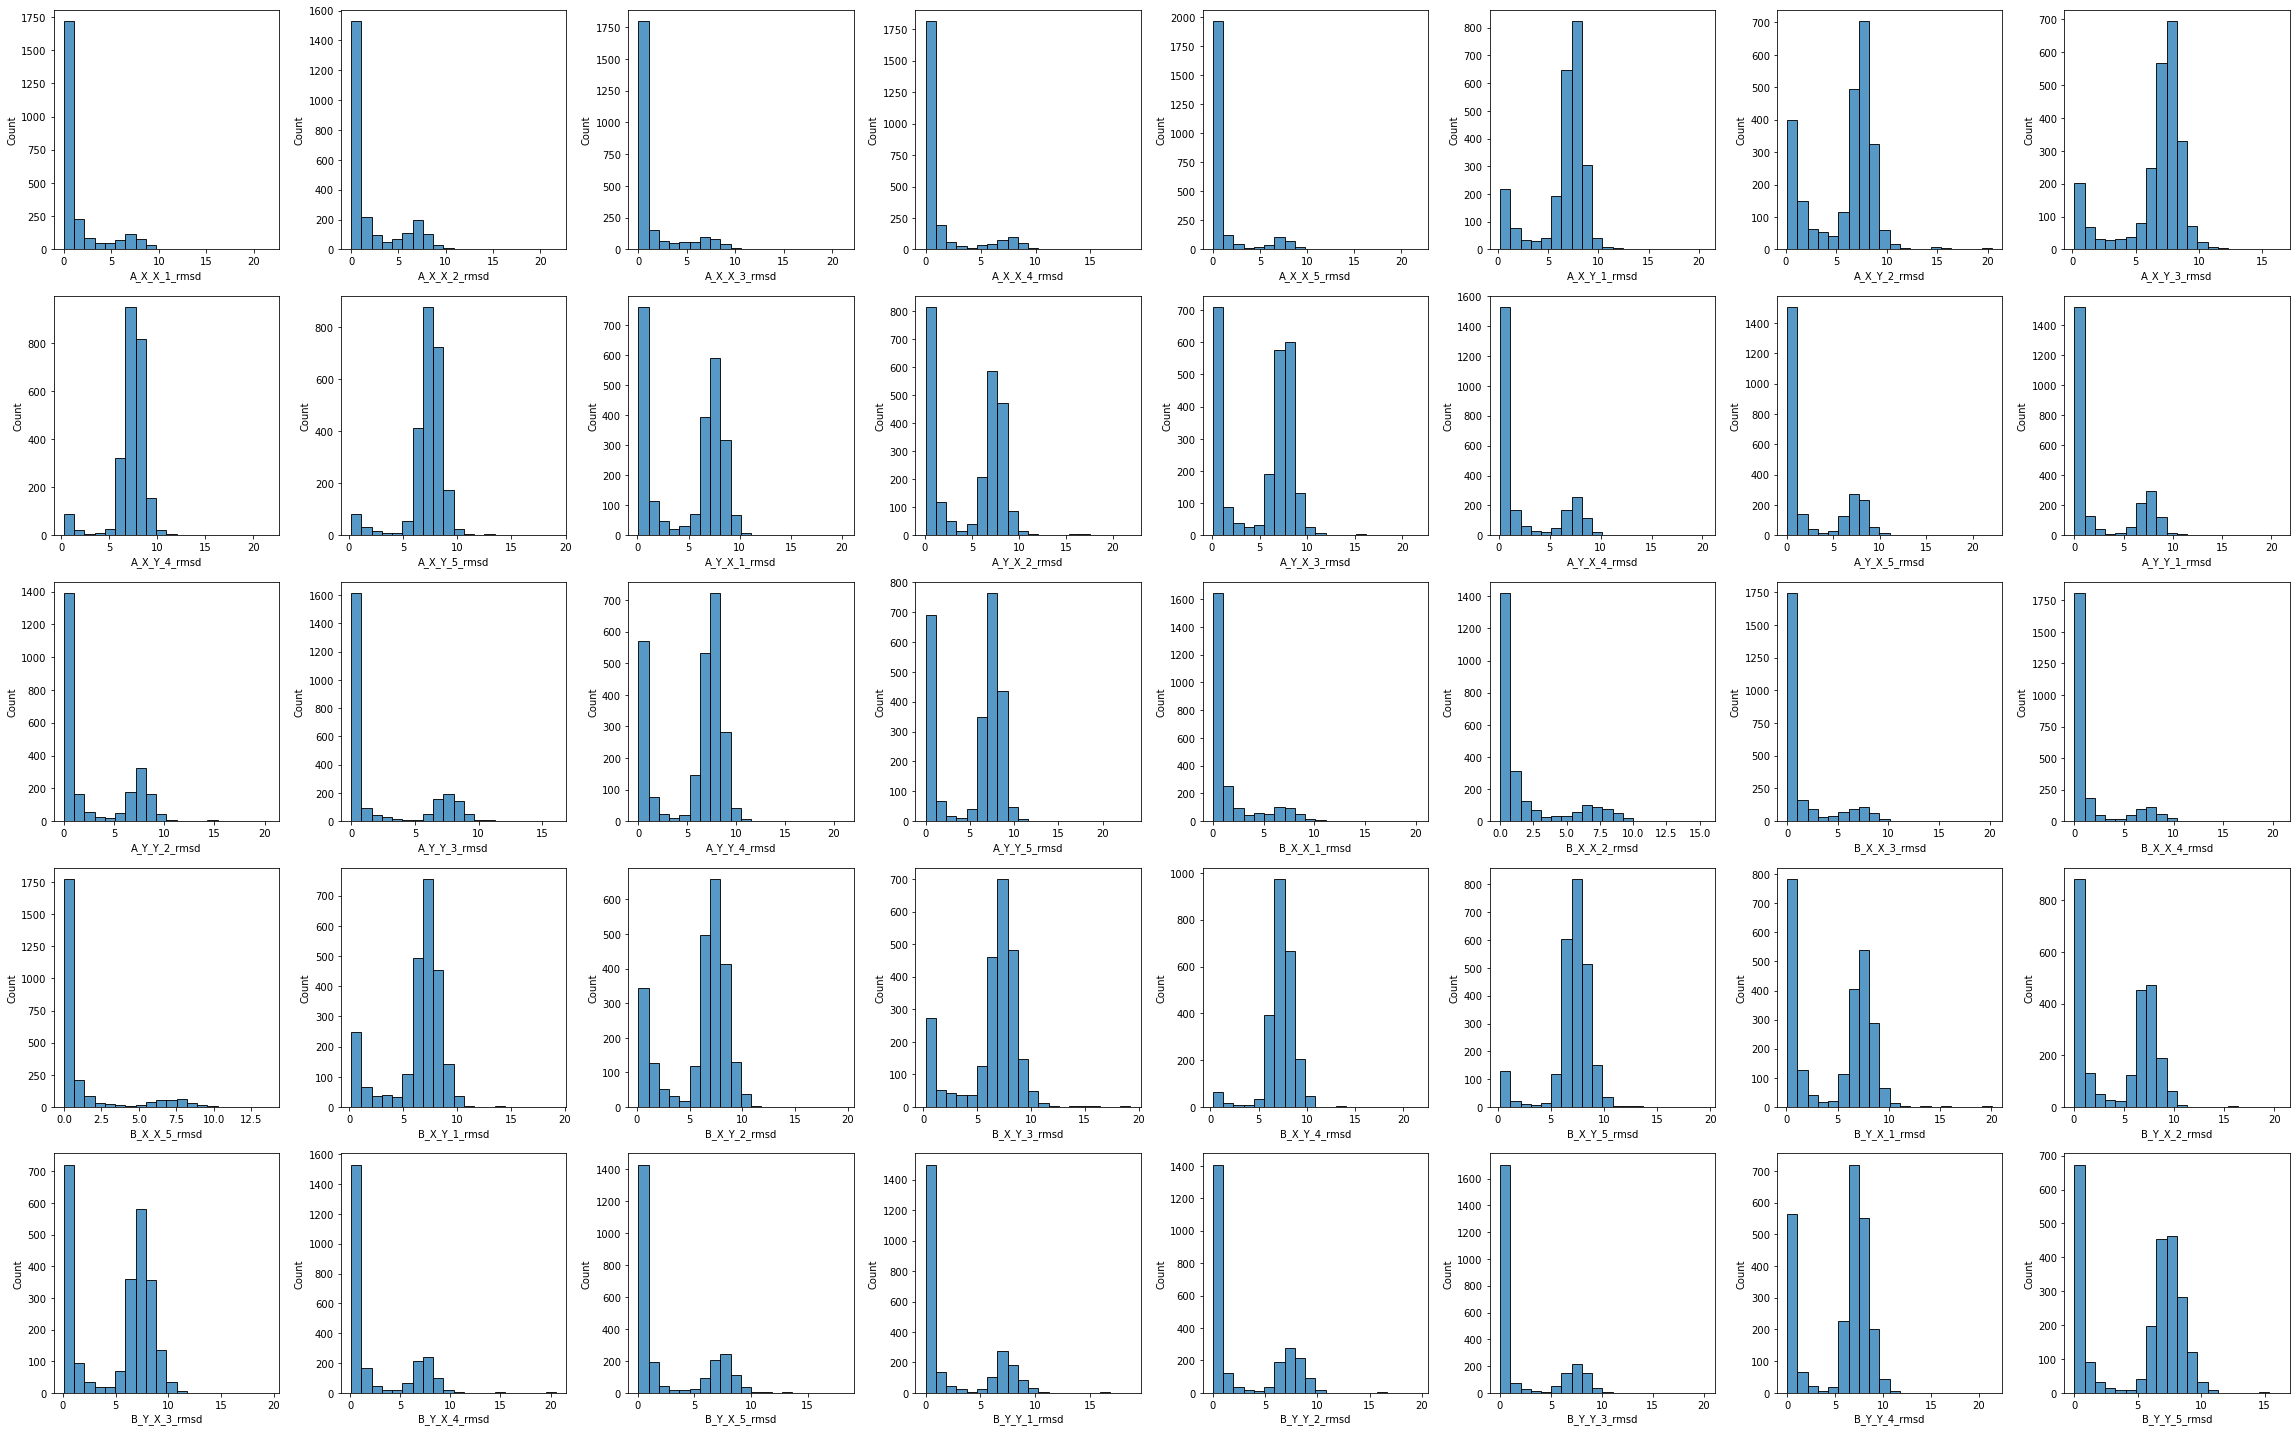

In [33]:
from crispy_shifty.utils.plotting import histplot_df
cols = [
    "A_X_X_1_rmsd",
    'A_X_X_2_rmsd',
    'A_X_X_3_rmsd',
    'A_X_X_4_rmsd',
    'A_X_X_5_rmsd',
    'A_X_Y_1_rmsd',
    'A_X_Y_2_rmsd',
    'A_X_Y_3_rmsd',
    'A_X_Y_4_rmsd',
    'A_X_Y_5_rmsd',
    'A_Y_X_1_rmsd',
    'A_Y_X_2_rmsd',
    'A_Y_X_3_rmsd',
    'A_Y_X_4_rmsd',
    'A_Y_X_5_rmsd',
    'A_Y_Y_1_rmsd',
    'A_Y_Y_2_rmsd',
    'A_Y_Y_3_rmsd',
    'A_Y_Y_4_rmsd',
    'A_Y_Y_5_rmsd',
    'B_X_X_1_rmsd',
    'B_X_X_2_rmsd',
    'B_X_X_3_rmsd',
    'B_X_X_4_rmsd',
    'B_X_X_5_rmsd',
    'B_X_Y_1_rmsd',
    'B_X_Y_2_rmsd',
    'B_X_Y_3_rmsd',
    'B_X_Y_4_rmsd',
    'B_X_Y_5_rmsd',
    'B_Y_X_1_rmsd',
    'B_Y_X_2_rmsd',
    'B_Y_X_3_rmsd',
    'B_Y_X_4_rmsd',
    'B_Y_X_5_rmsd',
    'B_Y_Y_1_rmsd',
    'B_Y_Y_2_rmsd',
    'B_Y_Y_3_rmsd',
    'B_Y_Y_4_rmsd',
    'B_Y_Y_5_rmsd',
]
the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20
)

40it [00:03, 10.36it/s]


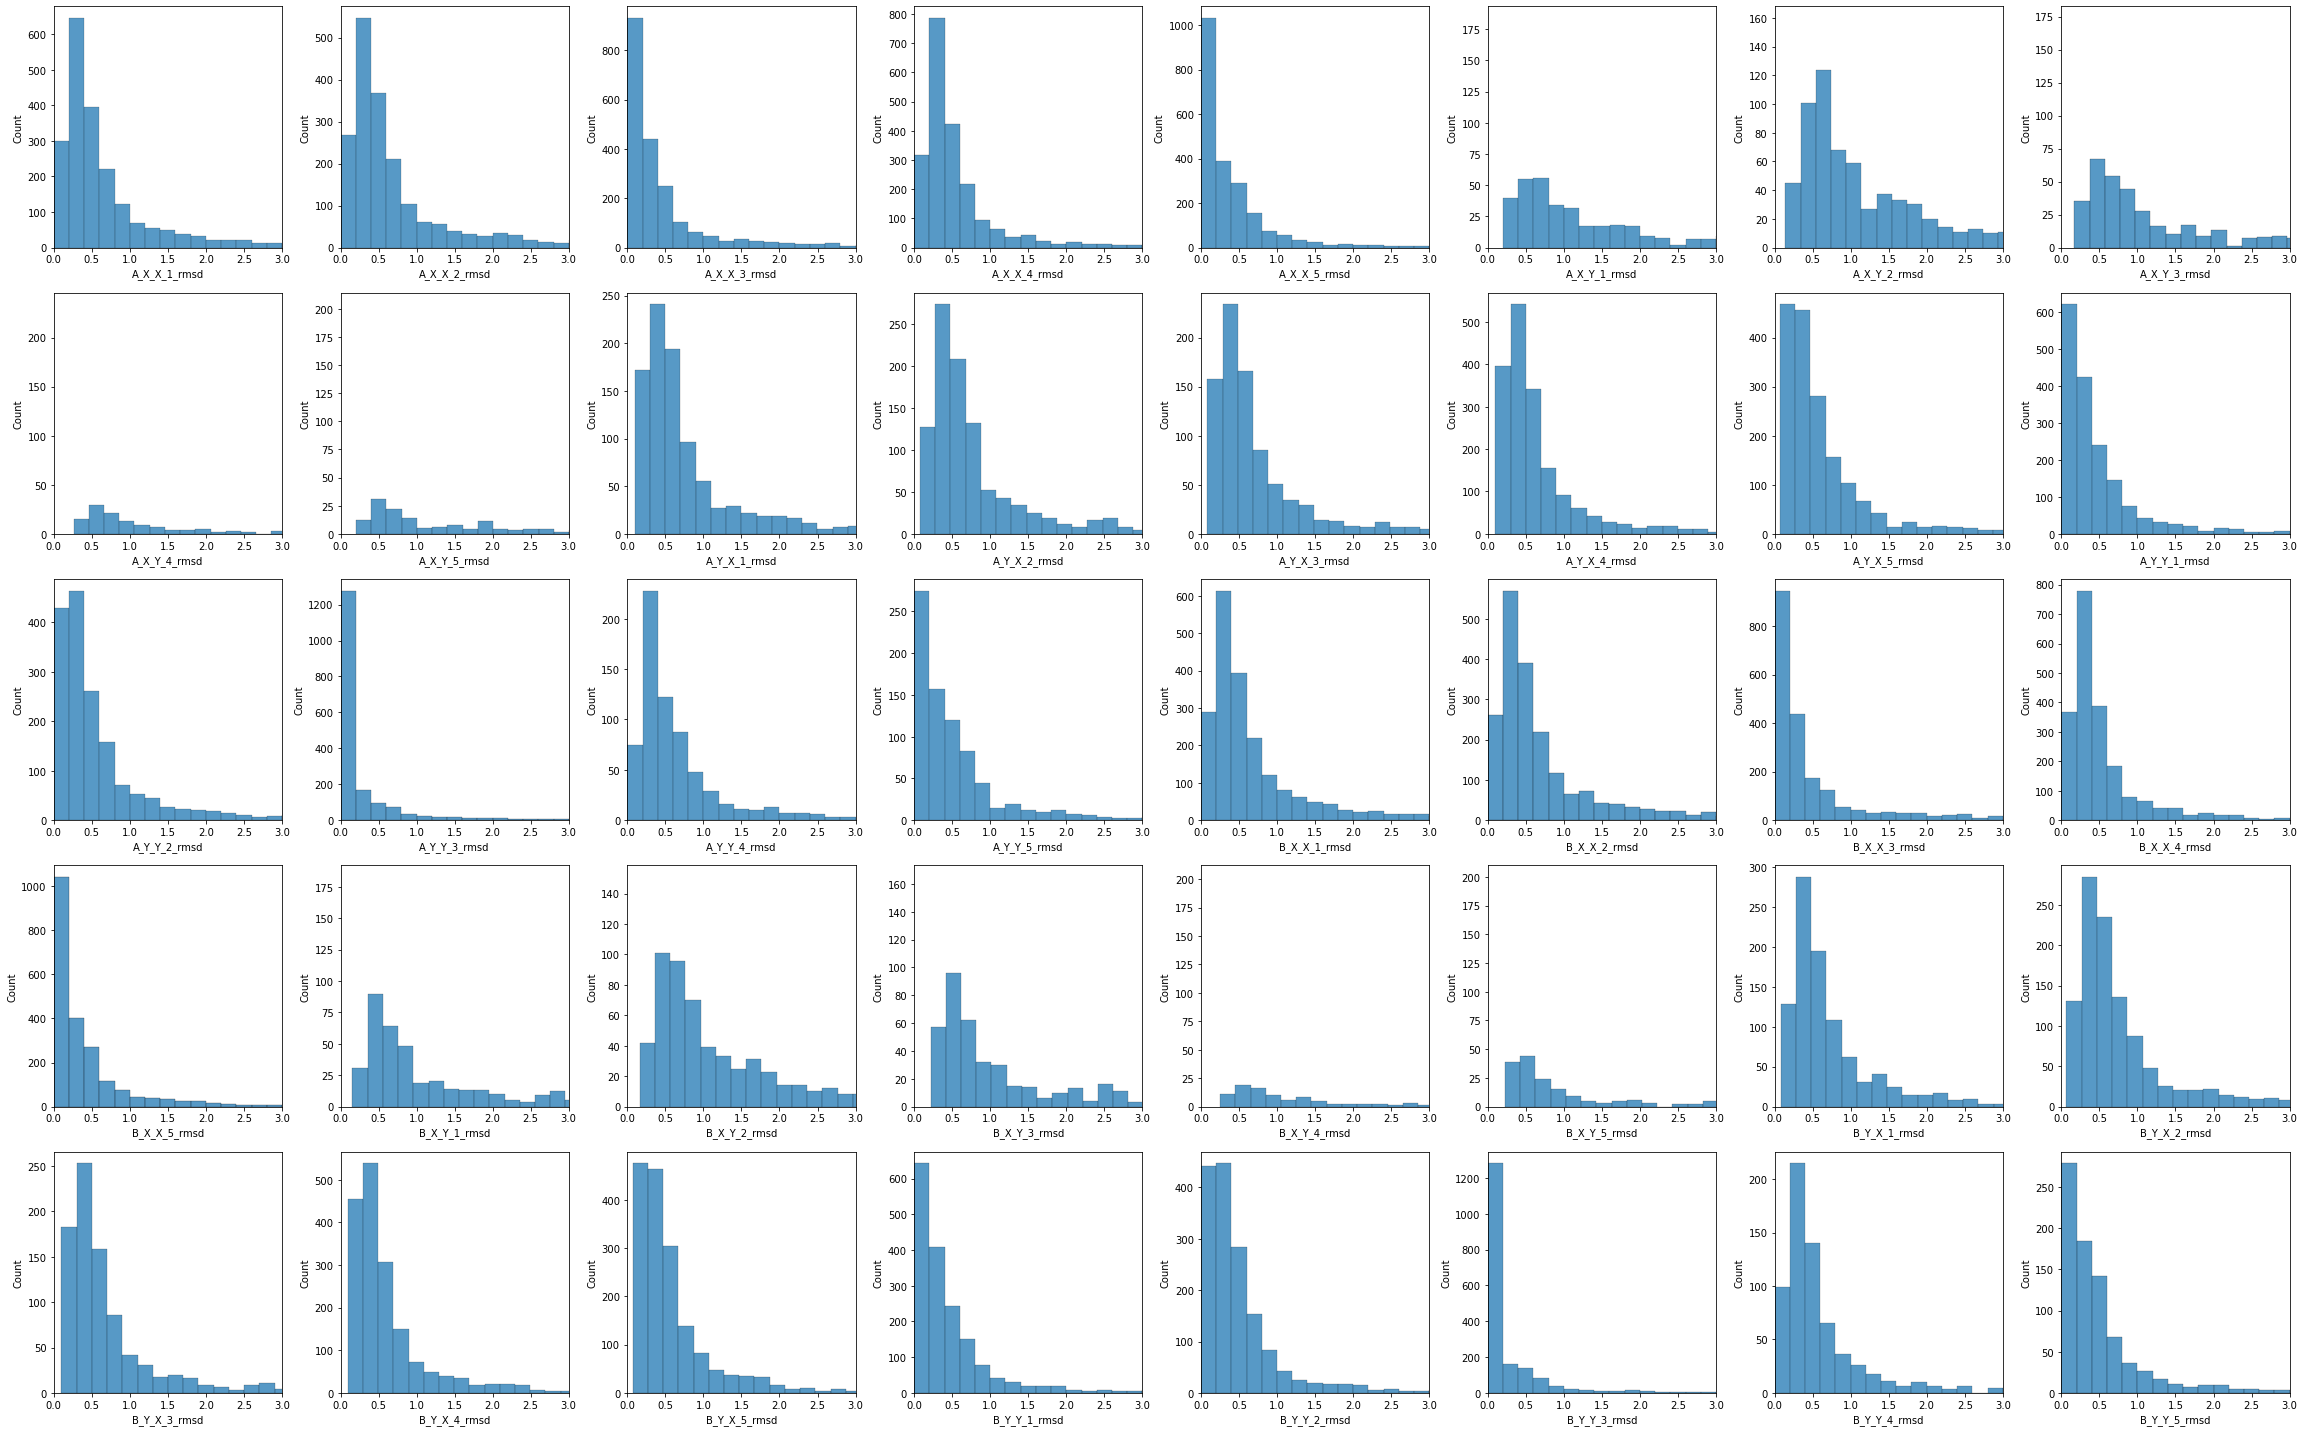

In [39]:
the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    binwidth=0.2,
)
for ax in the_fig[1].flatten():
    ax.set_xlim(0, 3)

In [5]:
from tqdm.auto import tqdm  # jupyter compatible progress bar
tqdm.pandas()  # link tqdm to pandas

# get the af2 metrics for each model in the dataframe for averaging below
x_af2_cols = ["X_mean_pae", "X_mean_pae_interaction", "X_mean_pae_intra_chain", "X_mean_pae_intra_chain_A", "X_mean_plddt", "X_pTMscore", "X_recycles", "X_rmsd_to_input", "X_seed", "X_tol", "X_type"]
y_af2_cols = ["Y_mean_pae", "Y_mean_pae_interaction", "Y_mean_pae_interaction_AB", "Y_mean_pae_interaction_BA", "Y_mean_pae_intra_chain", "Y_mean_pae_intra_chain_A", "Y_mean_pae_intra_chain_B", "Y_mean_plddt", "Y_pTMscore", "Y_recycles", "Y_rmsd_to_reference", "Y_seed", "Y_tol", "Y_type"]

def collect_model_metrics(row):
    all_model_scores = []
    for model_id in ["A_X_model_1", "A_X_model_2", "A_X_model_3", "A_X_model_4", "A_X_model_5", "B_X_model_1", "B_X_model_2", "B_X_model_3", "B_X_model_4", "B_X_model_5"]:
        model_index = combined_df.at[row["full_seq"], model_id].replace("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design", "/pscratch/sd/b/broerman")
        model_scores = scores_X_df.loc[model_index, x_af2_cols]
        model_scores.rename(index=lambda x: f"{model_id}_{x[1:]}", inplace=True)
        all_model_scores.append(model_scores)
    for model_id in ["Y_model_1", "Y_model_2", "Y_model_3", "Y_model_4", "Y_model_5"]:
        model_index = combined_df.at[row["full_seq"], model_id].replace("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design", "/pscratch/sd/b/broerman")
        model_scores = scores_Y_df.loc[model_index, y_af2_cols]
        model_scores.rename(index=lambda x: f"{model_id}_{x[1:]}", inplace=True)
        all_model_scores.append(model_scores)

    return pd.concat([row]+all_model_scores)

scores_df = scores_df.progress_apply(collect_model_metrics, axis=1)

  0%|          | 0/2433 [00:00<?, ?it/s]

In [6]:
import numpy as np

af2_metrics_to_average = [
    "mean_pae",
    "mean_pae_interaction",
    "mean_pae_interaction_AB",
    "mean_pae_interaction_BA",
    "mean_pae_intra_chain",
    "mean_pae_intra_chain_A",
    "mean_pae_intra_chain_B",
    "mean_plddt",
    "pTMscore",
    "tol",
]
rmsd_cutoff = 1.5

def combine_model_metrics(row, af2_metrics_to_average, rmsd_cutoff):
    multi_model_info = {
        "A_X_X": [],
        "A_X_Y": [],
        "A_X_U": [],
        "B_X_X": [],
        "B_X_Y": [],
        "B_X_U": [],
        "A_Y_Y": [],
        "A_Y_X": [],
        "A_Y_U": [],
        "B_Y_Y": [],
        "B_Y_X": [],
        "B_Y_U": [],
        "Y_Y": [],
    }

    for state, altstate in ["XY", "YX"]:
        for protomer in "AB":
            for model in "12345":
                if row[f"{protomer}_{state}_{state}_{model}_rmsd"] < rmsd_cutoff:
                    multi_model_info[f"{protomer}_{state}_{state}"].append(model)
                elif row[f"{protomer}_{state}_{altstate}_{model}_rmsd"] < rmsd_cutoff:
                    multi_model_info[f"{protomer}_{state}_{altstate}"].append(model)
                else:
                    multi_model_info[f"{protomer}_{state}_U"].append(model)
    for model in "12345":
        if row[f"Y_Y_{model}_rmsd"] < rmsd_cutoff:
            multi_model_info[f"Y_Y"].append(model)
    
    for metric in af2_metrics_to_average:
        for state in ["A_X", "B_X", "Y"]:
            if f"{state}_model_1__{metric}" not in row:
                # some metrics are not available for X models, for example mean_pae_interaction_AB
                continue
            row[f"{state}_{metric}"] = np.mean([row[f"{state}_model_{model}__{metric}"] for model in multi_model_info[f"{state}_{state[-1]}"]])

    for k, v in multi_model_info.items():
        row[k + "_models"] = ",".join(v)
        row[k + "_count"] = len(v)

    return row

scores_df = scores_df.progress_apply(combine_model_metrics, axis=1, af2_metrics_to_average=af2_metrics_to_average, rmsd_cutoff=rmsd_cutoff)

  0%|          | 0/2433 [00:00<?, ?it/s]

In [7]:
import os
if not os.path.exists("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/scores_combined_models.csv"):
    scores_df.to_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/scores_combined_models.csv")

In [1]:
import pandas as pd
scores_df = pd.read_csv("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/scores_combined_models.csv", index_col=0)

In [2]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    # 'display.max_rows', None,
):
    display(scores_df)

,A_X_X_1_rmsd,A_X_X_2_rmsd,A_X_X_3_rmsd,A_X_X_4_rmsd,A_X_X_5_rmsd,A_X_Y_1_rmsd,A_X_Y_2_rmsd,A_X_Y_3_rmsd,A_X_Y_4_rmsd,A_X_Y_5_rmsd,A_X_final_seq,A_X_mean_pae,A_X_mean_pae_interaction,A_X_mean_pae_intra_chain,A_X_mean_pae_intra_chain_A,A_X_mean_plddt,A_X_model,A_X_pTMscore,A_X_recycles,A_X_rmsd_to_input,A_X_sap,A_X_score_per_res,A_X_seed,A_X_tol,A_X_total_score,A_X_type,A_X_wnm_all,A_X_wnm_helix,A_Y_X_1_rmsd,A_Y_X_2_rmsd,A_Y_X_3_rmsd,A_Y_X_4_rmsd,A_Y_X_5_rmsd,A_Y_Y_1_rmsd,A_Y_Y_2_rmsd,A_Y_Y_3_rmsd,A_Y_Y_4_rmsd,A_Y_Y_5_rmsd,A_Y_final_seq,A_Y_sap,A_Y_score_per_res,A_Y_total_score,A_Y_wnm_all,A_Y_wnm_helix,B_X_X_1_rmsd,B_X_X_2_rmsd,B_X_X_3_rmsd,B_X_X_4_rmsd,B_X_X_5_rmsd,B_X_Y_1_rmsd,B_X_Y_2_rmsd,B_X_Y_3_rmsd,B_X_Y_4_rmsd,B_X_Y_5_rmsd,B_X_final_seq,B_X_mean_pae,B_X_mean_pae_interaction,B_X_mean_pae_intra_chain,B_X_mean_pae_intra_chain_A,B_X_mean_plddt,B_X_model,B_X_pTMscore,B_X_recycles,B_X_rmsd_to_input,B_X_sap,B_X_score_per_res,B_X_seed,B_X_tol,B_X_total_score,B_X_type,B_X_wnm_all,B_X_wnm_helix,B_Y_X_1_rmsd,B_Y_X_2_rmsd,B_Y_X_3_rmsd,B_Y_X_4_rmsd,B_Y_X_5_rmsd,B_Y_Y_1_rmsd,B_Y_Y_2_rmsd,B_Y_Y_3_rmsd,B_Y_Y_4_rmsd,B_Y_Y_5_rmsd,B_Y_final_seq,B_Y_sap,B_Y_score_per_res,B_Y_total_score,B_Y_wnm_all,B_Y_wnm_helix,Y_Y_1_rmsd,Y_Y_2_rmsd,Y_Y_3_rmsd,Y_Y_4_rmsd,Y_Y_5_rmsd,Y_cms,Y_ddg,Y_mean_pae,Y_mean_pae_interaction,Y_mean_pae_interaction_AB,Y_mean_pae_interaction_BA,Y_mean_pae_intra_chain,Y_mean_pae_intra_chain_A,Y_mean_pae_intra_chain_B,Y_mean_plddt,Y_model,Y_pTMscore,Y_recycles,Y_rmsd_to_reference,Y_sap,Y_score_per_res,Y_seed,Y_tol,Y_total_score,Y_type,abego_str_A,abego_str_B,bb_clash,bb_clash_A,bb_clash_B,closure_type_A,closure_type_B,cms_ac_bn,cms_dhr,cms_dhr_ac,cms_dhr_bn,designed_by,dhr_ac_int_count,dhr_bn_int_count,dhr_int_count,dslf_fa13,dssp_A,dssp_B,elapsed_time,fa_atr,fa_dun,fa_dun_dev,fa_dun_rot,fa_dun_semi,fa_elec,fa_intra_atr_xover4,fa_intra_elec,fa_intra_rep,fa_intra_rep_xover4,fa_intra_sol_xover4,fa_rep,fa_sol,full_seq,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,hxl_tors,lk_ball,lk_ball_bridge,lk_ball_bridge_uncpl,lk_ball_iso,lk_ball_wtd,loop_dist_A,loop_dist_B,loop_sc_A,loop_sc_B,mean_pae,mean_pae_interaction,mean_pae_intra_chain,mean_pae_intra_chain_A,mean_plddt,model,mpnn_msd_betas,mpnn_msd_design_area,mpnn_msd_temperature,new_loop_resis_A,new_loop_resis_B,num_Y_models,omega,pTMscore,p_aa_pp,parent,parent_length,parent_loop_dist,parent_path,pivot_helix_A,pivot_helix_B,pre_break_helix,pro_close,rama_prepro,recycles,ref,remodel_after_loop_A,remodel_after_loop_B,remodel_before_loop_A,remodel_before_loop_B,rmsd_to_input,sc_ac_bn,sc_dhr,sc_dhr_ac,sc_dhr_bn,score,score_1,score_124,score_134,score_14,score_2,score_23,score_3,score_4,score_per_res,seed,seq_A,seq_B,shift_A,shift_B,ss_sc,tol,total_length_A,total_length_B,total_score,type,wnm_1,wnm_2,wnm_3,wnm_4,wnm_A,wnm_B,wnm_hlx,yhh_planarity,A_X_model_1__mean_pae,A_X_model_1__mean_pae_interaction,A_X_model_1__mean_pae_intra_chain,A_X_model_1__mean_pae_intra_chain_A,A_X_model_1__mean_plddt,A_X_model_1__pTMscore,A_X_model_1__recycles,A_X_model_1__rmsd_to_input,A_X_model_1__seed,A_X_model_1__tol,A_X_model_1__type,A_X_model_2__mean_pae,A_X_model_2__mean_pae_interaction,A_X_model_2__mean_pae_intra_chain,A_X_model_2__mean_pae_intra_chain_A,A_X_model_2__mean_plddt,A_X_model_2__pTMscore,A_X_model_2__recycles,A_X_model_2__rmsd_to_input,A_X_model_2__seed,A_X_model_2__tol,A_X_model_2__type,A_X_model_3__mean_pae,A_X_model_3__mean_pae_interaction,A_X_model_3__mean_pae_intra_chain,A_X_model_3__mean_pae_intra_chain_A,A_X_model_3__mean_plddt,A_X_model_3__pTMscore,A_X_model_3__recycles,A_X_model_3__rmsd_to_input,A_X_model_3__seed,A_X_model_3__tol,A_X_model_3__type,A_X_model_4__mean_pae,A_X_model_4__mean_pae_interaction,A_X_model_4__mean_pae_intra_chain,A_X_model_4__mean_pae_intra_chain_A,A_X_model_4__mean_plddt,A_X_model_4__pTMscore,A_X_model_4__recycles,A_X_model_4__rmsd_to_input,A_X_model_4__seed,A_X_model_4__tol,A_X_model_4__type,A_X_model_5__mean_pae,A_X_model_5__mean_pae_interaction,A_X_model

In [3]:
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, '/home/broerman/crispy_shifty/')
from crispy_shifty.utils.plotting import histplot_df

simulation_name = "07_filter_order"
output_path = os.path.join("/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design",simulation_name)

25it [00:00, 34.62it/s]


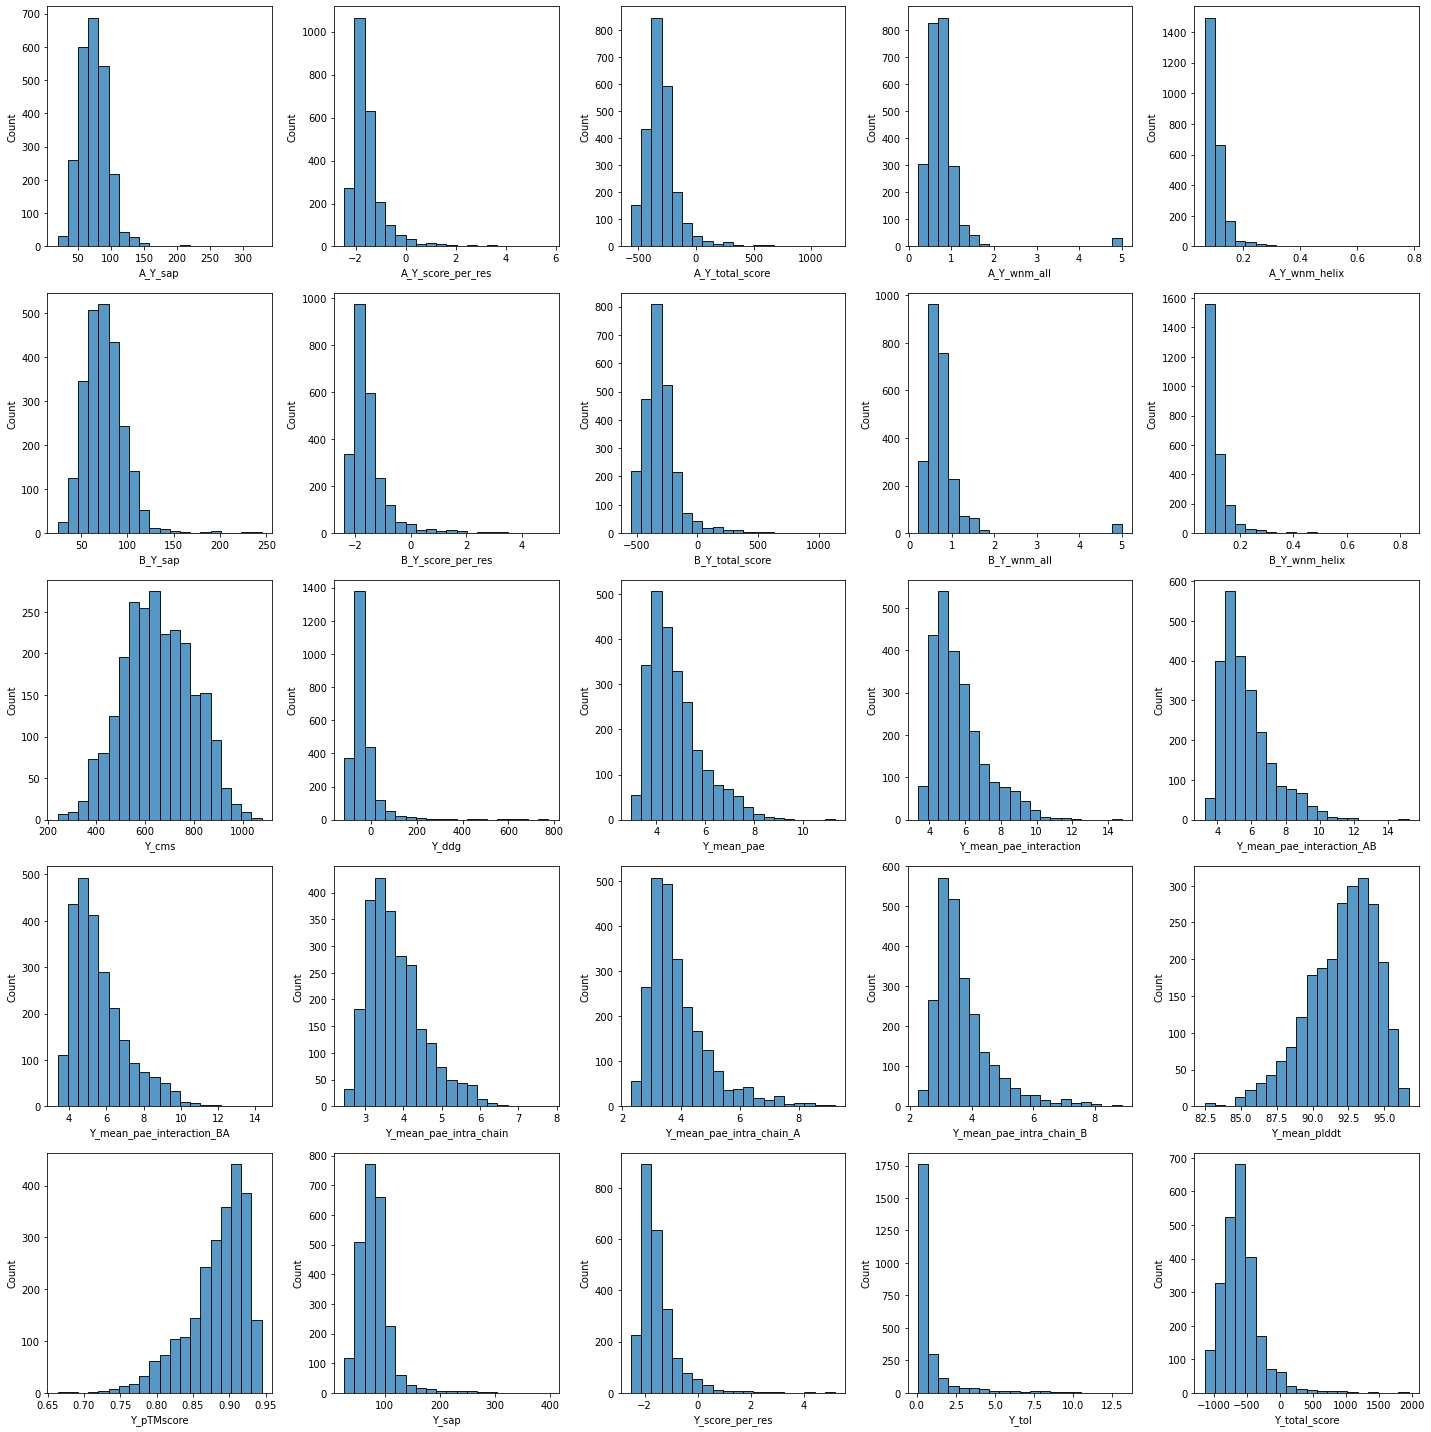

In [16]:
avoid = ["Y_recycles", "Y_seed", "Y_type"]
cols = [col for col in scores_df.columns if "Y_" in col and col not in avoid and "model" not in col and "count" not in col and "rmsd" not in col and "seq" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "Y_all_scores.png"))

24it [00:00, 24.99it/s]


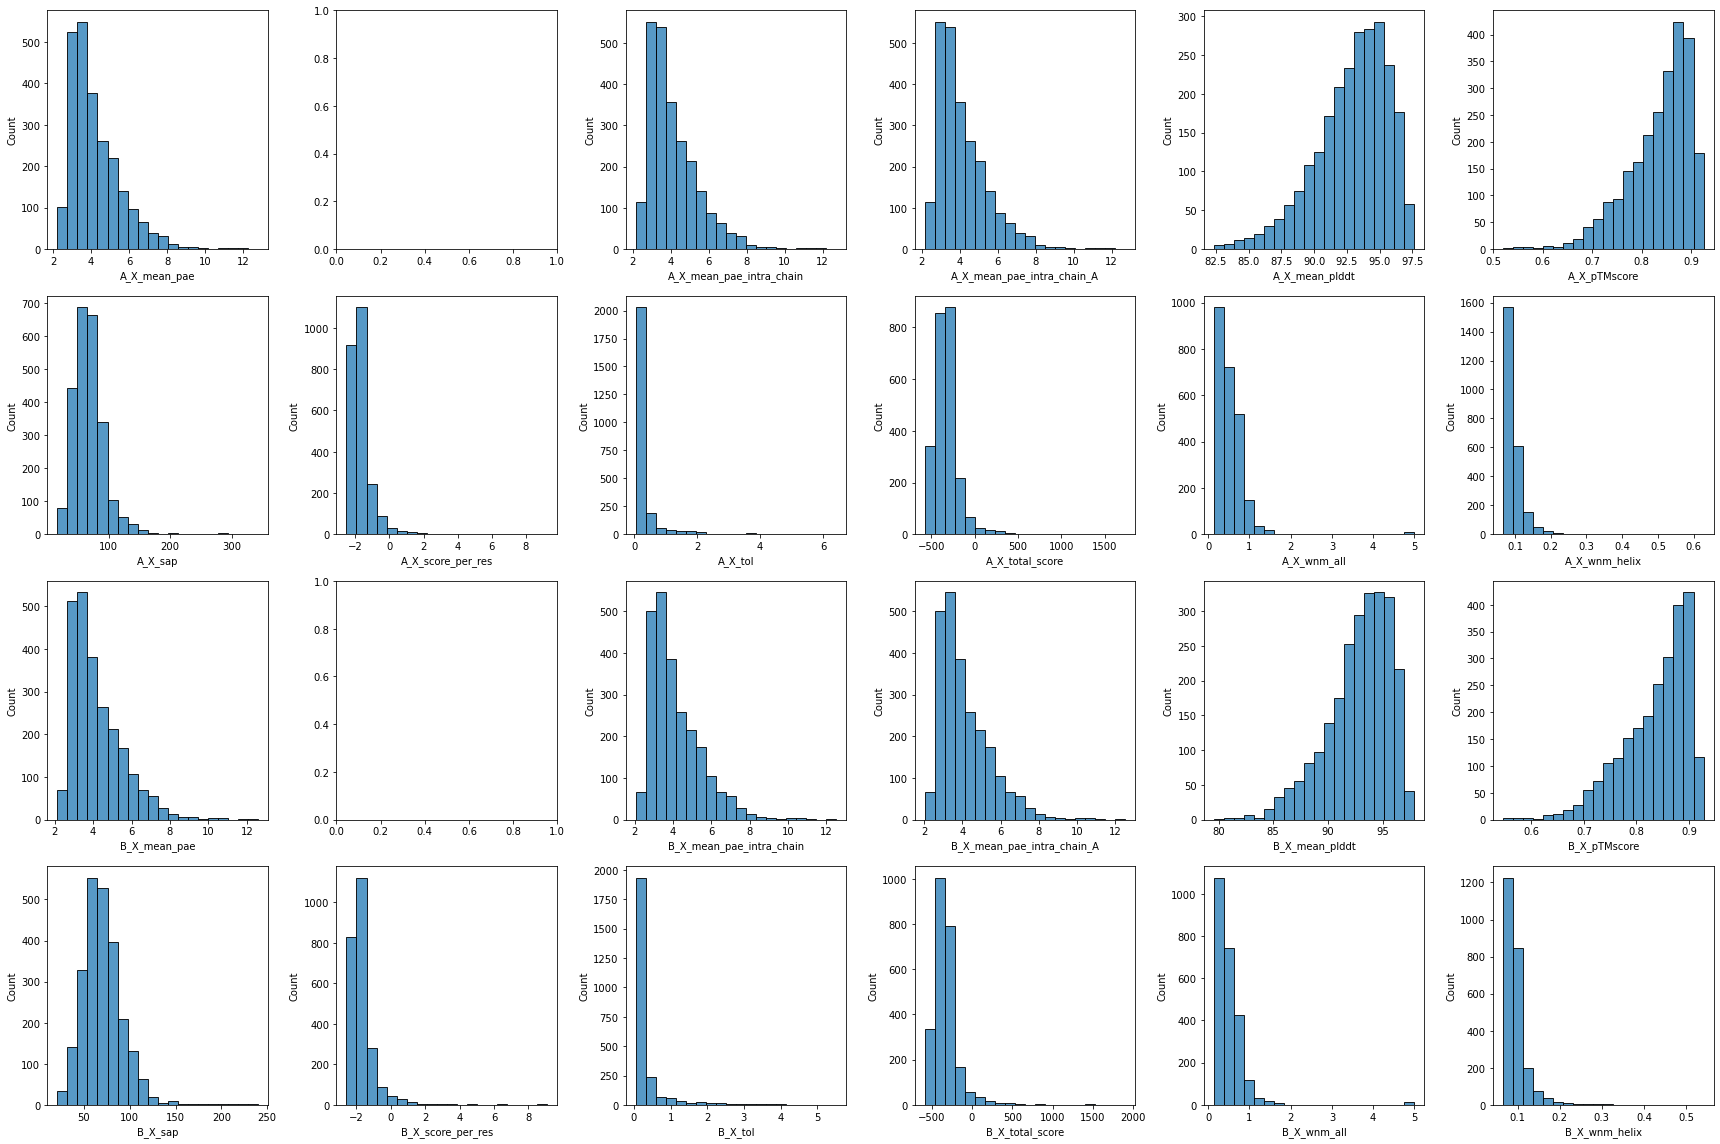

In [12]:
avoid = ["A_X_recycles", "A_X_seed", "A_X_type", "B_X_recycles", "B_X_seed", "B_X_type"]
cols = [col for col in scores_df.columns if "X_" in col and col not in avoid and "model" not in col and "count" not in col and "rmsd" not in col and "seq" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "X_all_scores.png"))

17it [00:00, 26.52it/s]


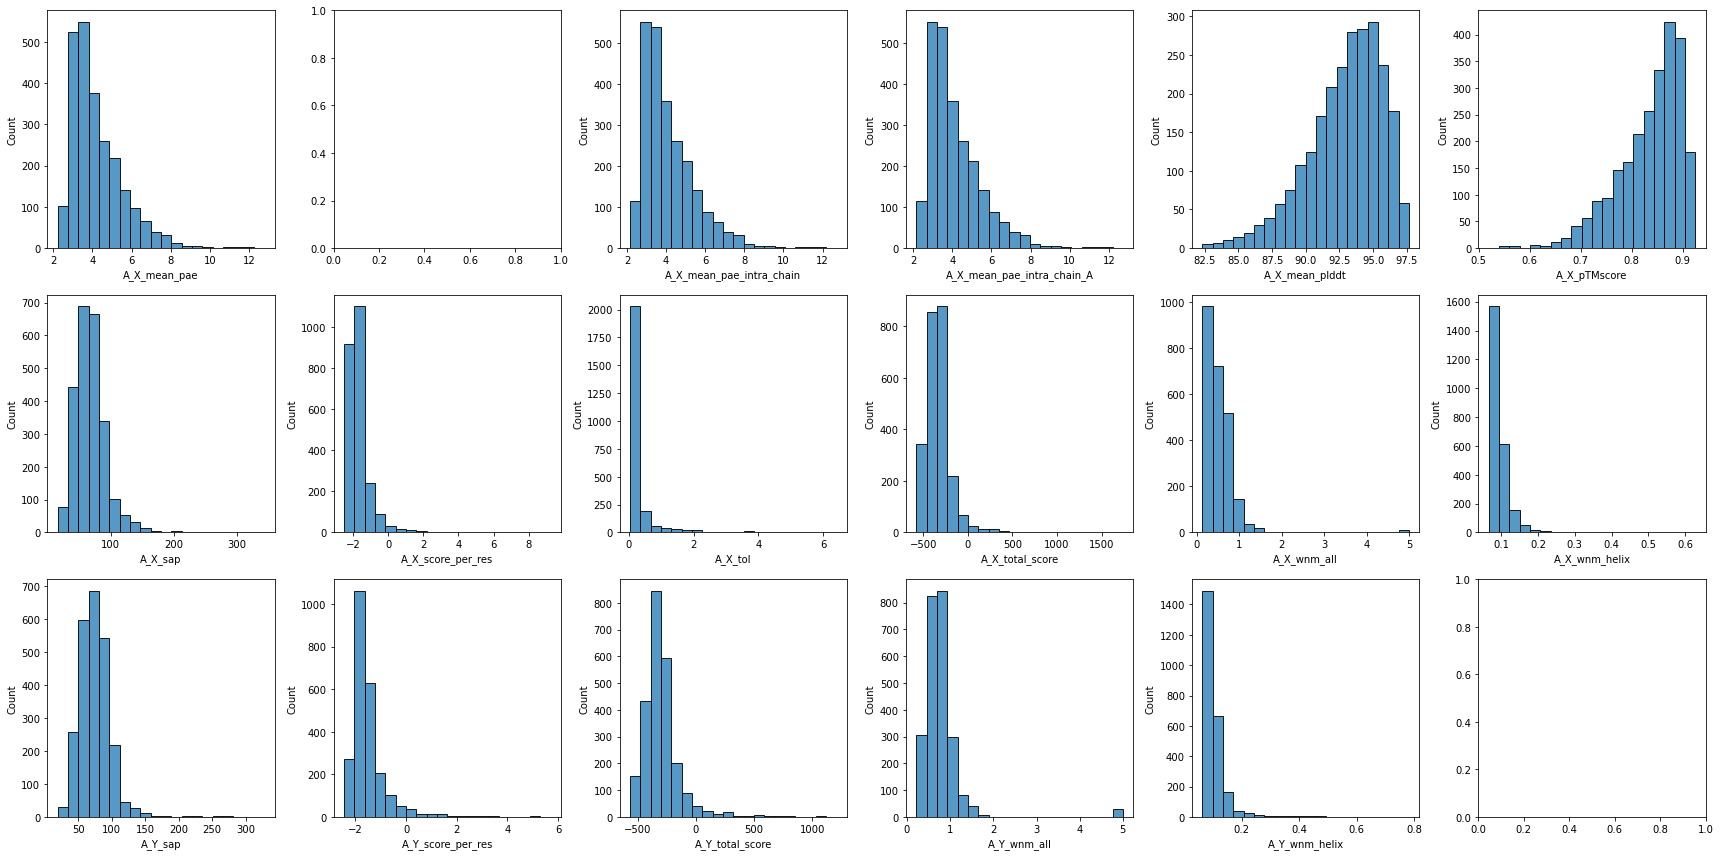

In [5]:
cols = [col for col in scores_df.columns if "A_" in col and "model" not in col and "count" not in col and "rmsd" not in col and "seq" not in col and "seed" not in col and "recycles" not in col and "type" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "A_all_scores.png"))

17it [00:00, 23.00it/s]


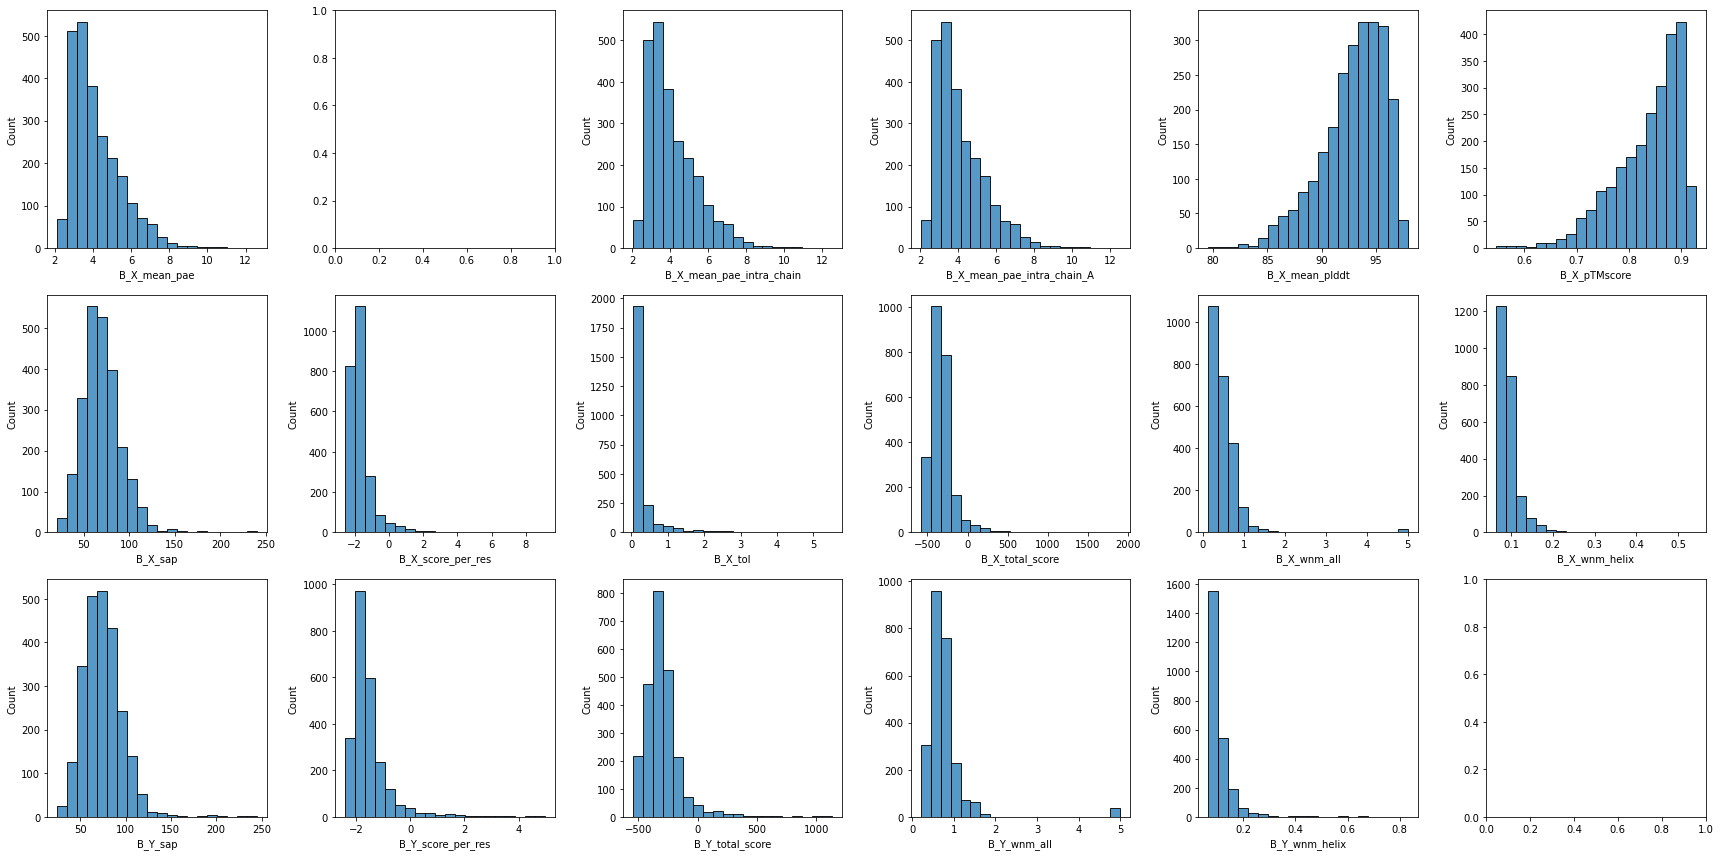

In [6]:
cols = [col for col in scores_df.columns if "B_" in col and "model" not in col and "count" not in col and "rmsd" not in col and "seq" not in col and "seed" not in col and "recycles" not in col and "type" not in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "B_all_scores.png"))

13it [00:00, 22.52it/s]


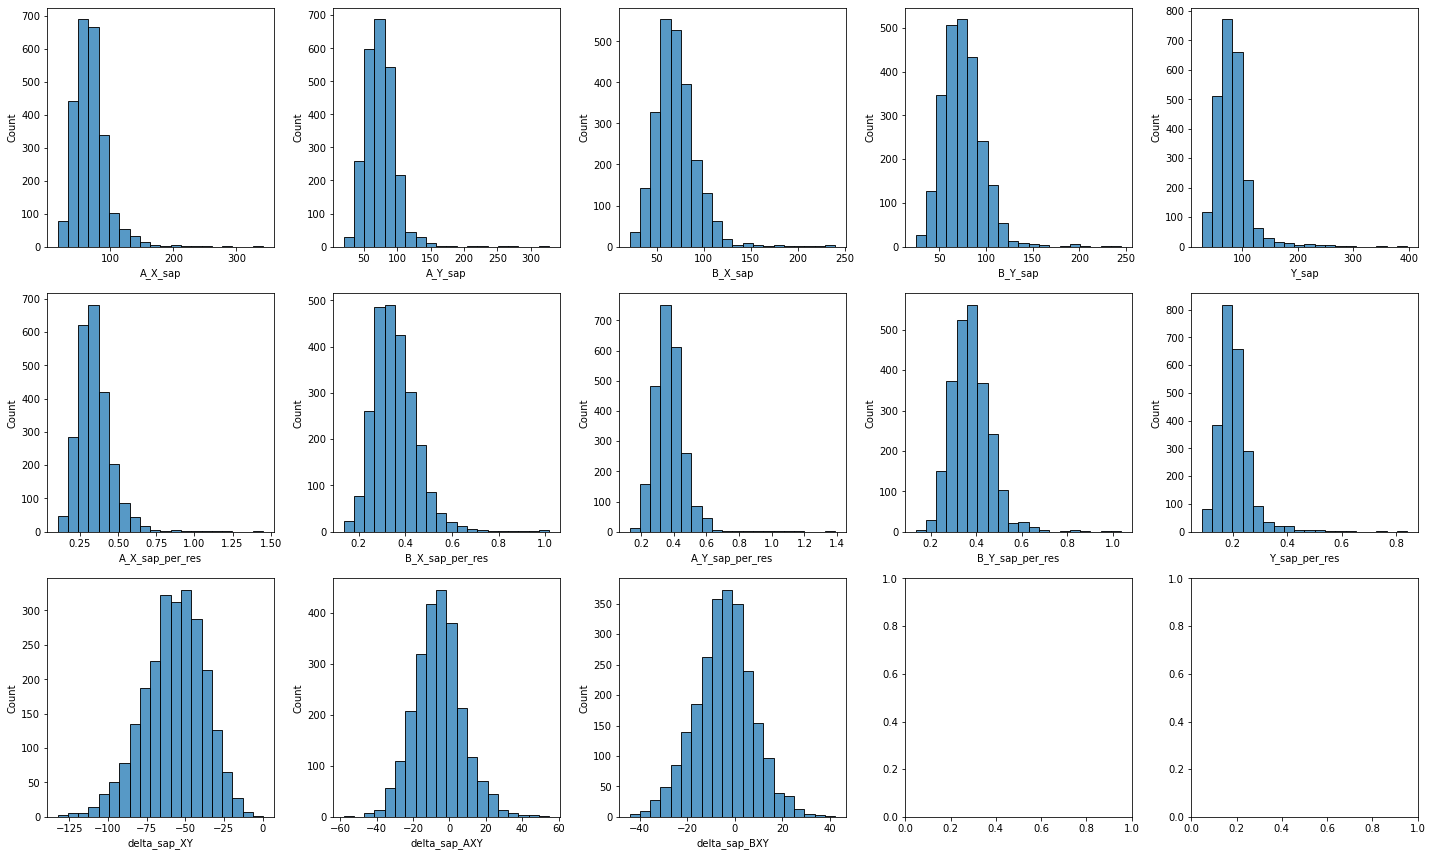

In [4]:
scores_df["A_X_sap_per_res"] = scores_df["A_X_sap"]/scores_df["total_length_A"]
scores_df["B_X_sap_per_res"] = scores_df["B_X_sap"]/scores_df["total_length_B"]
scores_df["A_Y_sap_per_res"] = scores_df["A_Y_sap"]/scores_df["total_length_A"]
scores_df["B_Y_sap_per_res"] = scores_df["B_Y_sap"]/scores_df["total_length_B"]
scores_df["Y_sap_per_res"] = scores_df["Y_sap"]/(scores_df["total_length_A"]+scores_df["total_length_B"])
scores_df["delta_sap_XY"] = scores_df["Y_sap"] - (
    scores_df["A_X_sap"] + scores_df["B_X_sap"]
)
scores_df["delta_sap_AXY"] = scores_df["A_X_sap"] - scores_df["A_Y_sap"]
scores_df["delta_sap_BXY"] = scores_df["B_X_sap"] - scores_df["B_Y_sap"]

cols = [col for col in scores_df.columns if "sap" in col]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "sap_all_scores.png"))

13it [00:00, 23.26it/s]


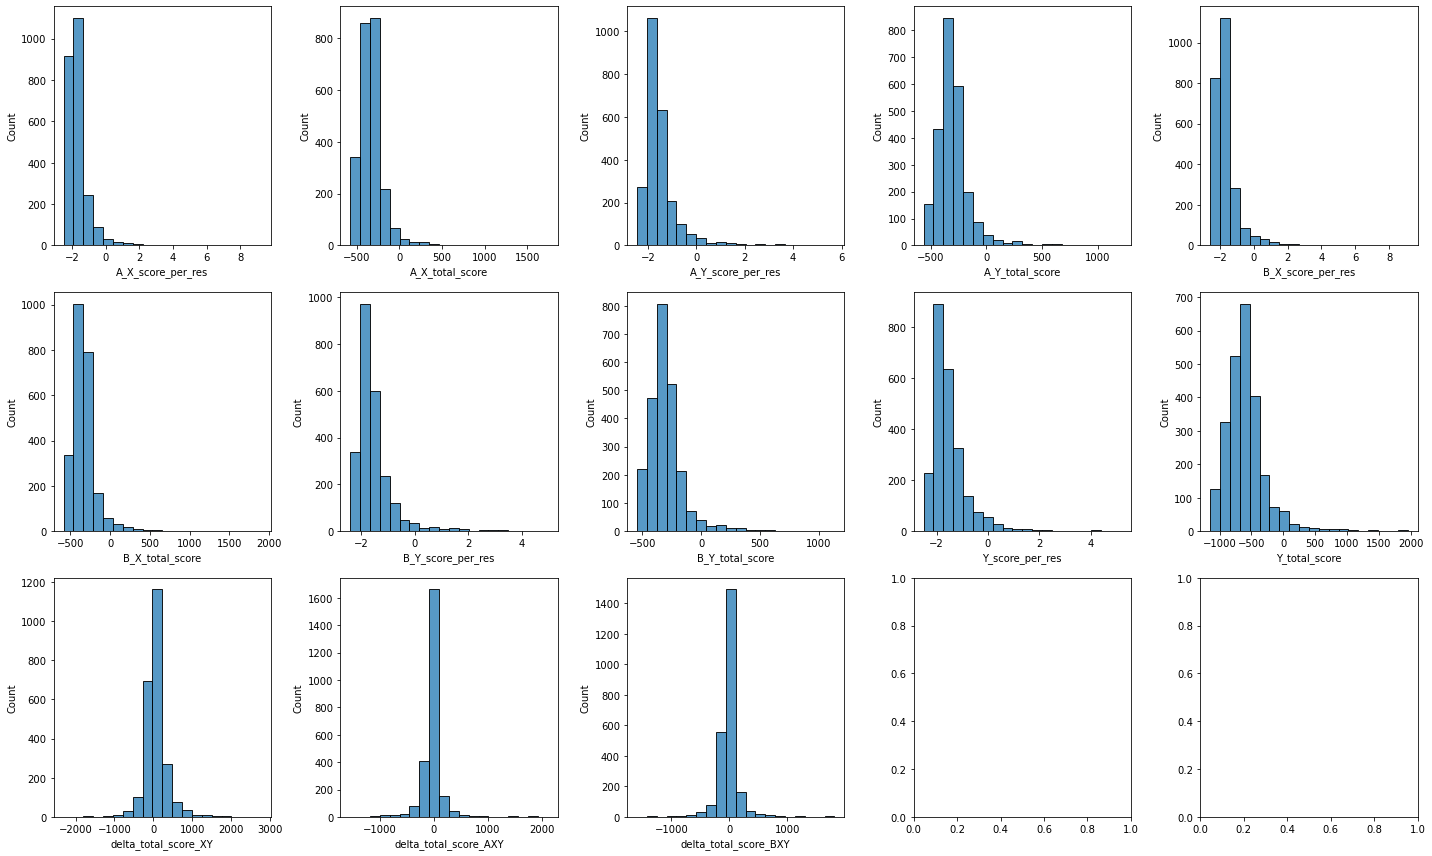

In [5]:
scores_df["delta_total_score_XY"] = scores_df["Y_total_score"] - (
    scores_df["A_X_total_score"] + scores_df["B_X_total_score"]
)
scores_df["delta_total_score_AXY"] = (
    scores_df["A_X_total_score"] - scores_df["A_Y_total_score"]
)
scores_df["delta_total_score_BXY"] = (
    scores_df["B_X_total_score"] - scores_df["B_Y_total_score"]
)
cols = [col for col in scores_df.columns if "score" in col and col not in ["score", "score_per_res", "total_score"] and "pTMscore" not in col and not col.split("_")[-1].isdigit()]

the_fig = histplot_df(
    df=scores_df,
    cols=cols,
    bins=20,
)
plt.savefig(os.path.join(output_path, "rosetta_all_scores.png"))

### Filtering on Rosetta metrics

10it [00:00, 22.70it/s]


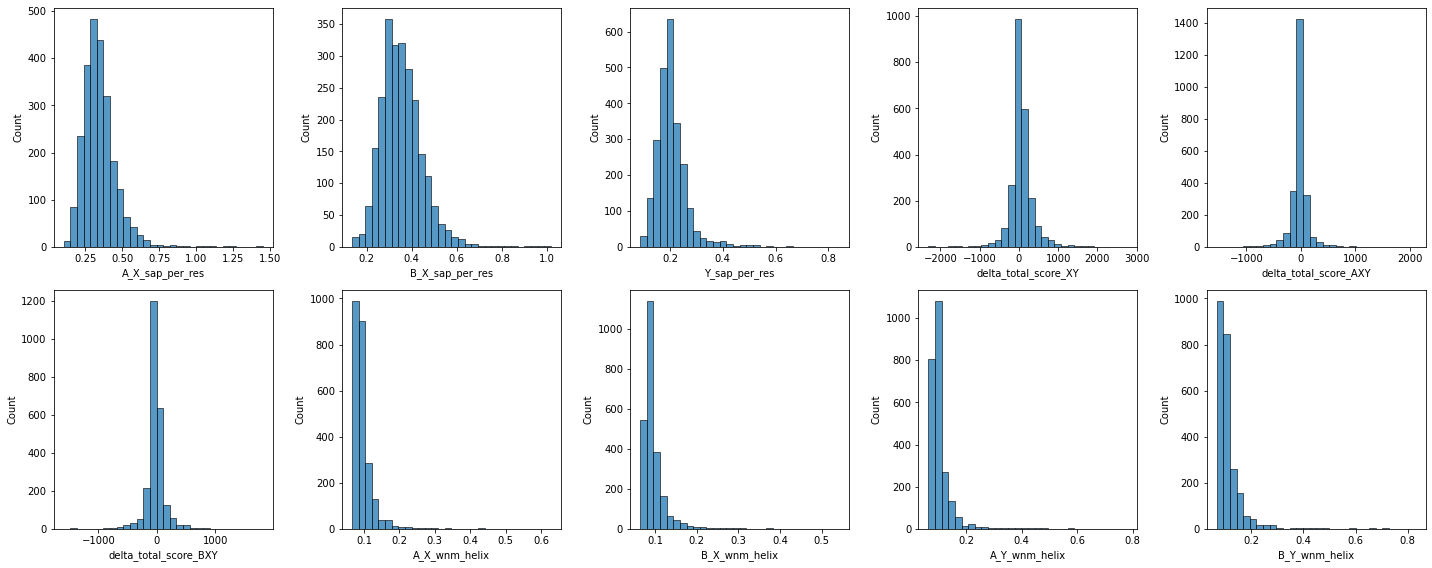

In [6]:
# plot all filtering metrics
filtering_cols = [
    "A_X_sap_per_res",
    "B_X_sap_per_res",
    "Y_sap_per_res",
    "delta_total_score_XY",
    "delta_total_score_AXY",
    "delta_total_score_BXY",
    "A_X_wnm_helix",
    "B_X_wnm_helix",
    "A_Y_wnm_helix",
    "B_Y_wnm_helix",
]
the_fig = histplot_df(
    df=scores_df,
    cols=filtering_cols,
    bins=30,
)

In [17]:
rosetta_filtered_df = scores_df.query("\
    A_X_sap_per_res <= 0.5 and \
    B_X_sap_per_res <= 0.5 and \
    Y_sap_per_res <= 0.5 and \
    A_X_wnm_helix <= 0.15 and \
    B_X_wnm_helix <= 0.15 and \
    A_Y_wnm_helix <= 0.15 and \
    B_Y_wnm_helix <= 0.15 \
")
len(rosetta_filtered_df)

1642

### Filtering on AF2 metrics

13it [00:00, 33.64it/s]


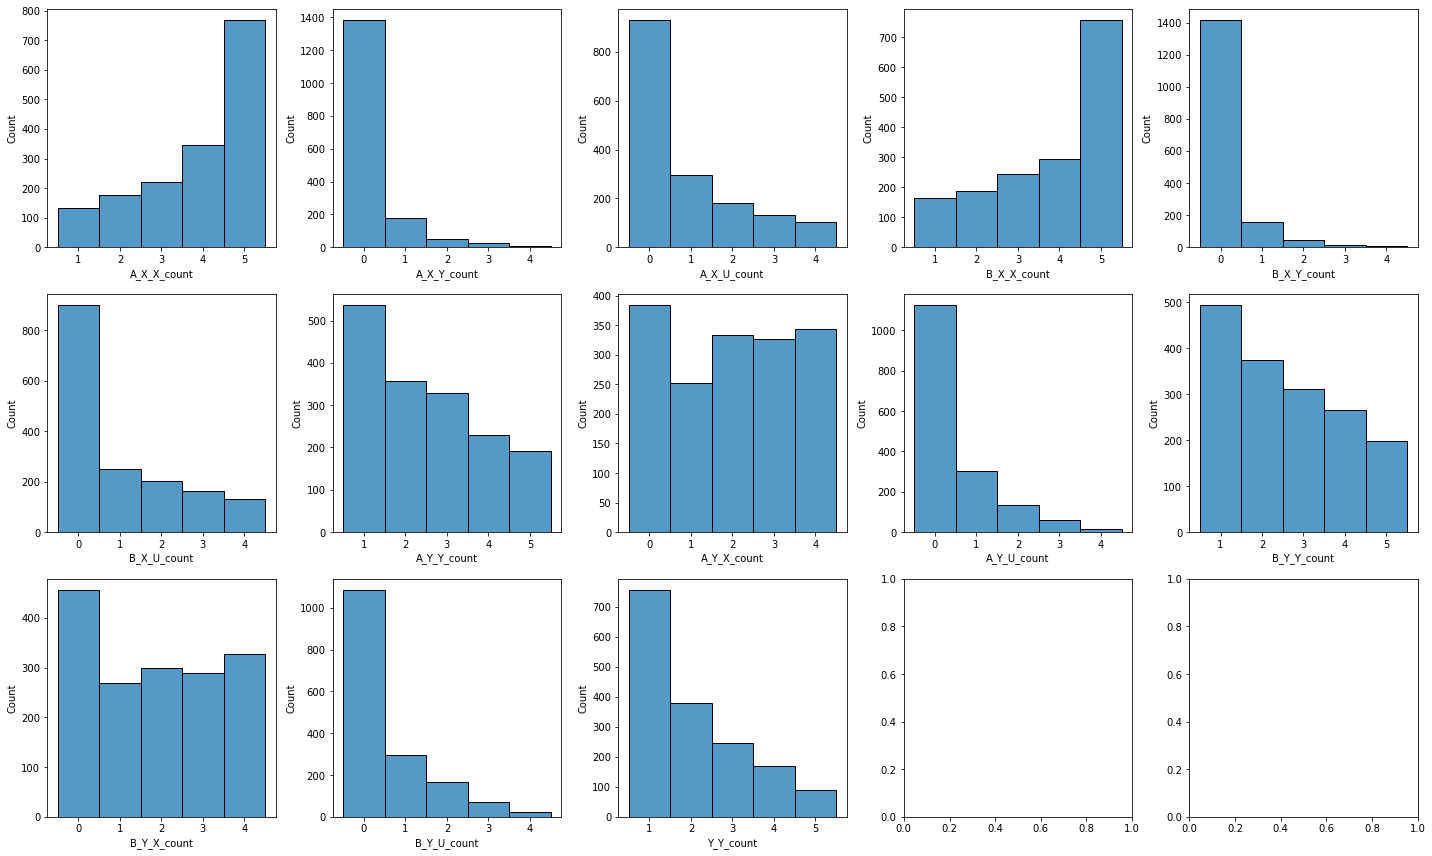

In [27]:
# plot all filtering metrics
filtering_cols = [
    "A_X_X_count",
    "A_X_Y_count",
    "A_X_U_count",
    "B_X_X_count",
    "B_X_Y_count",
    "B_X_U_count",
    "A_Y_Y_count",
    "A_Y_X_count",
    "A_Y_U_count",
    "B_Y_Y_count",
    "B_Y_X_count",
    "B_Y_U_count",
    "Y_Y_count",
]
the_fig = histplot_df(
    df=rosetta_filtered_df,
    cols=filtering_cols,
    discrete=True,
)

In [40]:
af2_count_filtered_df = rosetta_filtered_df.query("\
    A_X_X_count >= 3 and \
    B_X_X_count >= 3 and \
    Y_Y_count >= 3 and \
    A_X_U_count <= 0 and \
    B_X_U_count <= 0 and \
    A_Y_U_count <= 0 and \
    B_Y_U_count <= 0 \
")
len(af2_count_filtered_df)

103

9it [00:00, 39.96it/s]


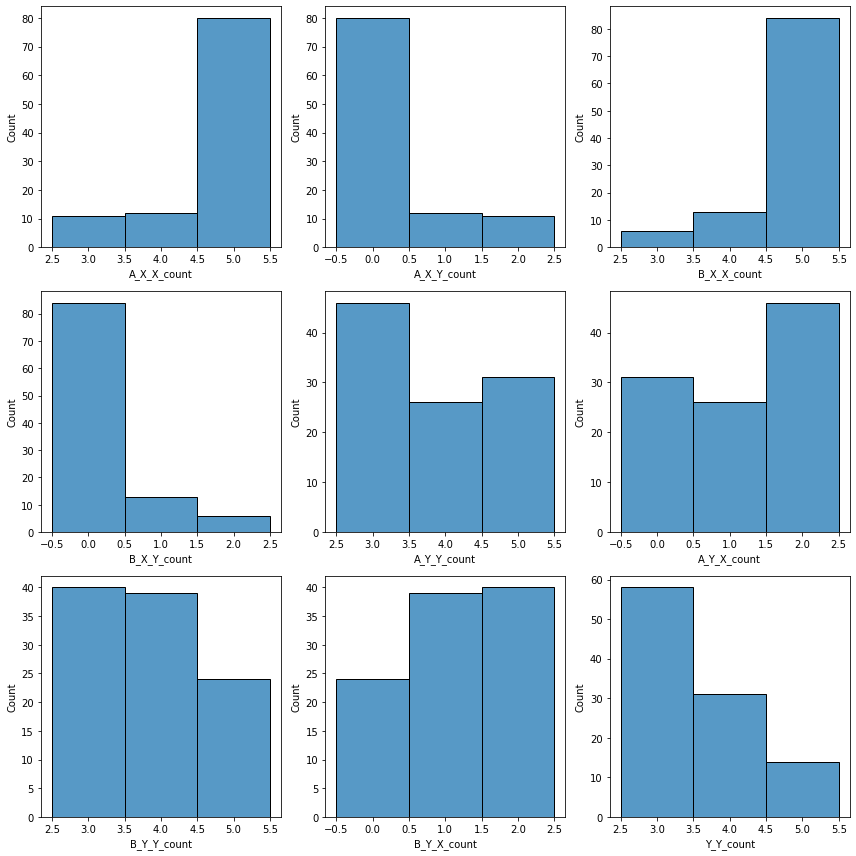

In [ ]:
# plot all filtering metrics
filtering_cols = [
    "A_X_X_count",
    "A_X_Y_count",
    "B_X_X_count",
    "B_X_Y_count",
    "A_Y_Y_count",
    "A_Y_X_count",
    "B_Y_Y_count",
    "B_Y_X_count",
    "Y_Y_count",
]
the_fig = histplot_df(
    df=af2_count_filtered_df,
    cols=filtering_cols,
    discrete=True,
)

11it [00:00, 12.65it/s]


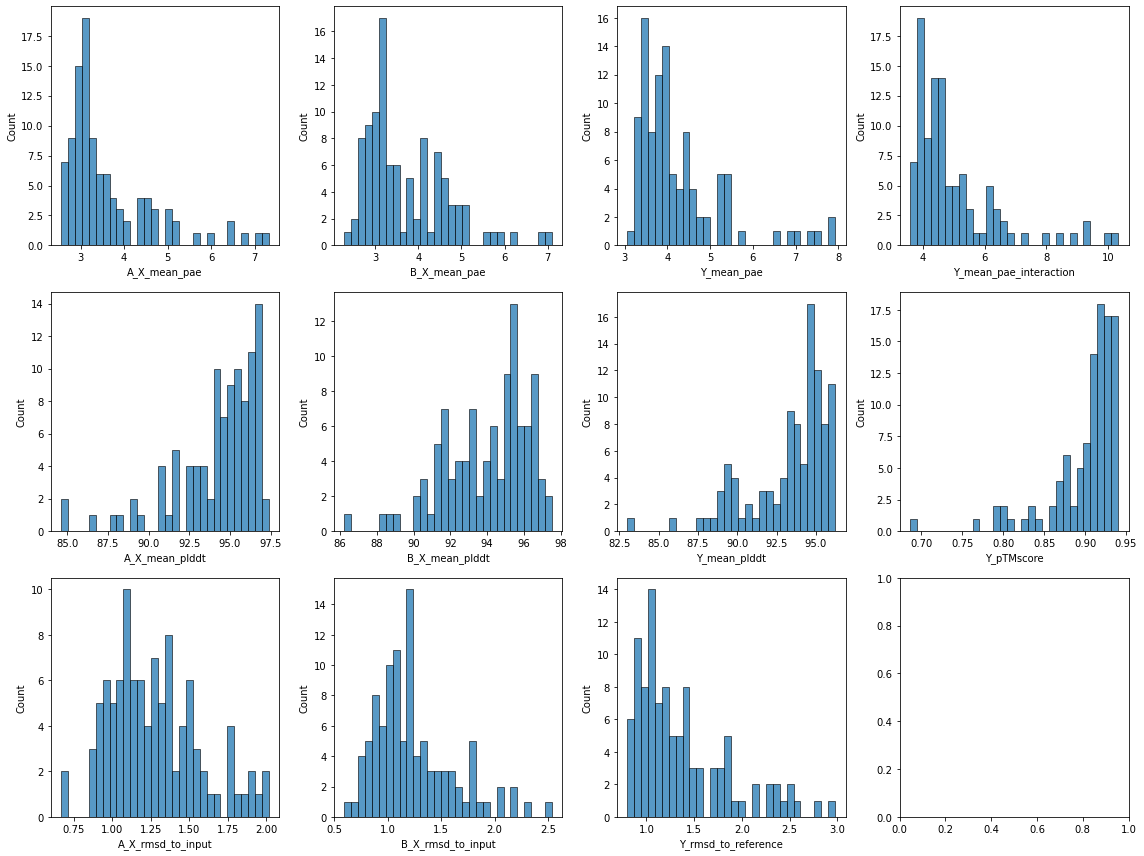

In [43]:
# plot all filtering metrics
filtering_cols = [
    "A_X_mean_pae",
    "B_X_mean_pae",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "A_X_mean_plddt",
    "B_X_mean_plddt",
    "Y_mean_plddt",
    "Y_pTMscore",
    "A_X_rmsd_to_input",
    "B_X_rmsd_to_input",
    "Y_rmsd_to_reference",
]
the_fig = histplot_df(
    df=af2_count_filtered_df,
    cols=filtering_cols,
    bins=30,
)

In [47]:
af2_metric_filtered_df = af2_count_filtered_df.query("\
    A_X_mean_pae <= 5.5 and \
    B_X_mean_pae <= 5.5 and \
    Y_mean_pae <= 6 and \
    Y_mean_pae_interaction <= 7 and \
    A_X_mean_plddt >= 93 and \
    B_X_mean_plddt >= 93 and \
    Y_mean_plddt >= 93 \
")
len(af2_metric_filtered_df)

49

11it [00:00, 33.27it/s]


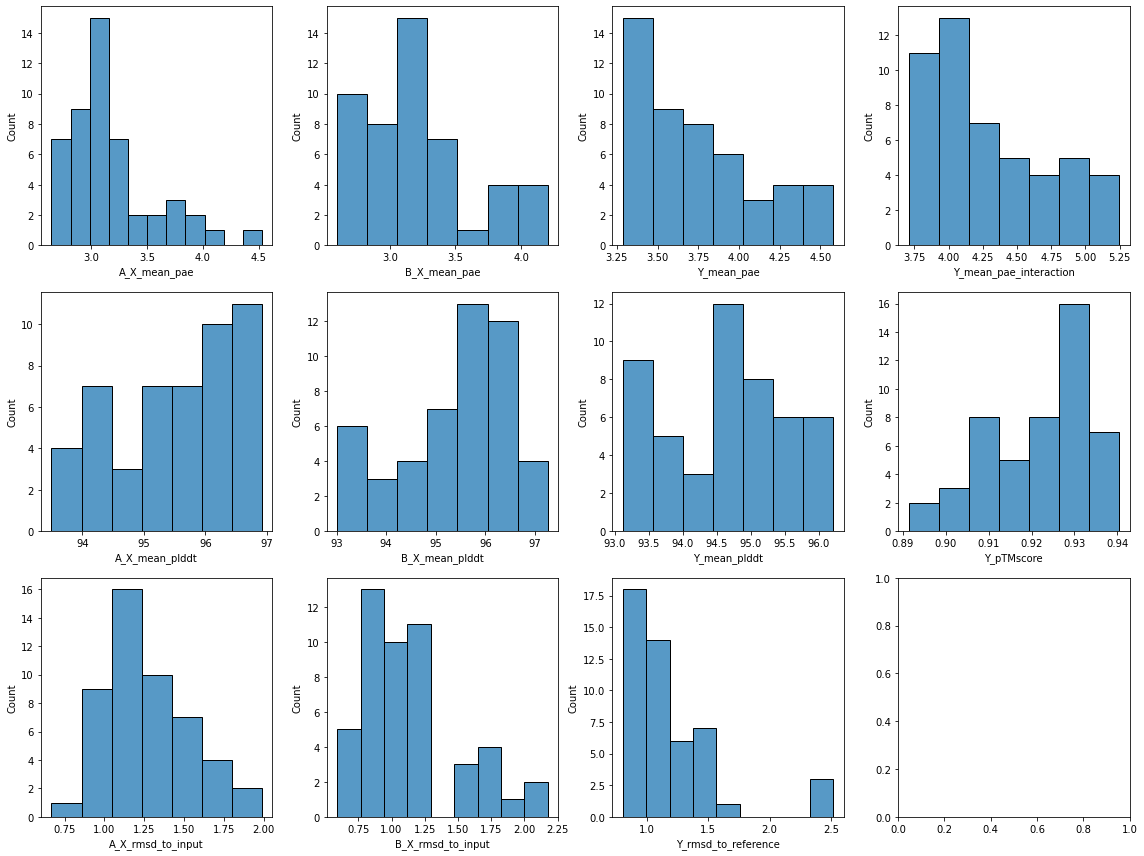

In [48]:
# plot all filtering metrics
filtering_cols = [
    "A_X_mean_pae",
    "B_X_mean_pae",
    "Y_mean_pae",
    "Y_mean_pae_interaction",
    "A_X_mean_plddt",
    "B_X_mean_plddt",
    "Y_mean_plddt",
    "Y_pTMscore",
    "A_X_rmsd_to_input",
    "B_X_rmsd_to_input",
    "Y_rmsd_to_reference",
]
the_fig = histplot_df(
    df=af2_metric_filtered_df,
    cols=filtering_cols,
)

In [50]:
af2_metric_filtered_df.parent.value_counts()

X26_3_27_4_ct2_fe     24
X27_2_27_2_ct5_fg     16
X19_3_17_2_ct2_fg      4
X26_3_26_4_ct2_fe      1
TH_DHR_T5              1
X23_2_15_3_ct5_fe      1
X26_3_24_2_ct12_fe     1
X26_3_20_2_ct1_fe      1
Name: parent, dtype: int64

This is not very diverse. Also do the ranked filtering you used for the OPSs, preserving parent diversity.

In [ ]:
from IPython.display import display
with pd.option_context(
    'display.max_columns', None,
    'display.max_rows', None,
):
    display(af2_metric_filtered_df.sort_values(by="parent"))

In [49]:
if not os.path.exists(os.path.join(output_path, "scores_filtered.csv")):
    af2_metric_filtered_df.to_csv(os.path.join(output_path, "scores_filtered.csv"))

In [52]:
# copy designs
import bz2
from collections import defaultdict

for index, row in af2_metric_filtered_df.iterrows():
    out_fname = f"/home/broerman/crispy_shifty/projects/crispy_shifty_dimers/round_3/design/07_filter_order/selected_best_designs/{row.parent}_{row.Y_mean_plddt:.01f}_{row.A_X_mean_plddt:.01f}_{row.B_X_mean_plddt:.01f}_{row.Y_mean_pae:.02f}_{row.A_X_mean_pae:.02f}_{row.B_X_mean_pae:.02f}_{row.Y_mean_pae_interaction:.02f}.pdb"
    with open(index, 'rb') as f_in:
        with open(out_fname, 'wb') as f_out:
            f_out.write(bz2.decompress(f_in.read()))